Part 1: Self-Study on ROC and AUC

· What is the ROC curve?
it shows the performance of a model by looking at the true positive rates against the false positives

· What does the AUC score represent?
This is the area under the curve that shows the performance on all thresholds and the higher the better

· How do ROC and AUC compare with other evaluation metrics like accuracy, precision, recall, and F1-score?
Use ROC for imbalanced datasets and when you need a threshold-independent metric.
And Precision, Recall, or F1-score when specific error types matter more.


Part 2: Applying Multiple Algorithms and Evaluating Metrics


1. Load and Prepare the Dataset

o Use the Titanic dataset (as in the class exercise).

o Preprocess the data as needed (handle missing values, encode categorical variables, etc.).

o Include the exercises we did in class, such as correlation and plotting a correlation matrix.

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic_clean.csv') 

df.replace('', np.nan, inplace=True)

df.dropna(inplace=True)
print(df.columns)
print(df.dtypes)



Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')
Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Title           object
Family_Size      int64
dtype: object


In [11]:
encoded = pd.get_dummies(df, columns=['Cabin', 'Embarked', 'Name','Sex','Ticket', 'Title'], drop_first=True)

corr_matrix = encoded.corr()
print(corr_matrix)

                       Age      Fare     Parch  PassengerId    Pclass  \
Age               1.000000 -0.071639 -0.254320     0.044056 -0.304142   
Fare             -0.071639  1.000000  0.383972     0.017243 -0.311713   
Parch            -0.254320  0.383972  1.000000    -0.063456  0.058366   
PassengerId       0.044056  0.017243 -0.063456     1.000000 -0.082977   
Pclass           -0.304142 -0.311713  0.058366    -0.082977  1.000000   
...                    ...       ...       ...          ...       ...   
Ticket_WE/P 5735  0.117032 -0.006894  0.145354     0.074638 -0.037186   
Title_Master     -0.393689 -0.027618  0.256872    -0.017377  0.186180   
Title_Miss       -0.291433  0.159140  0.151630    -0.101525  0.030447   
Title_Mr          0.291097 -0.122649 -0.185332     0.008827 -0.116235   
Title_Mrs         0.105762  0.008872 -0.024058     0.085657  0.039590   

                     SibSp  Survived  Family_Size  Cabin_A14  Cabin_A16  ...  \
Age              -0.141006 -0.220053    -0.

Train Multiple Classification Models

o In addition to the Random Forest classifier used in class, apply at least two more classification algorithms of your choice (e.g., Logistic Regression, Support Vector Machine, K-Nearest Neighbors, Gradient Boosting, etc.).

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
X = encoded.drop(columns=["Survived"])
y = encoded["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# #Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

#Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

#K Nearest Neighbors
kn_model = KNeighborsClassifier()
kn_model.fit(X_train_scaled, y_train)
y_pred_kn = kn_model.predict(X_test_scaled)
y_prob_kn = kn_model.predict_proba(X_test_scaled)[:, 1]


Evaluate Model Performance

o Compute the following metrics for each model:
§ Accuracy
§ Precision
§ Recall
§ F1-score
§ Confusion Matrix

o Display these metrics in an organized format (e.g., tables, visualizations).

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.829268   0.848485  0.933333  0.888889
1  Logistic Regression  0.804878   0.789474  1.000000  0.882353
2  K-Nearest Neighbors  0.707317   0.725000  0.966667  0.828571


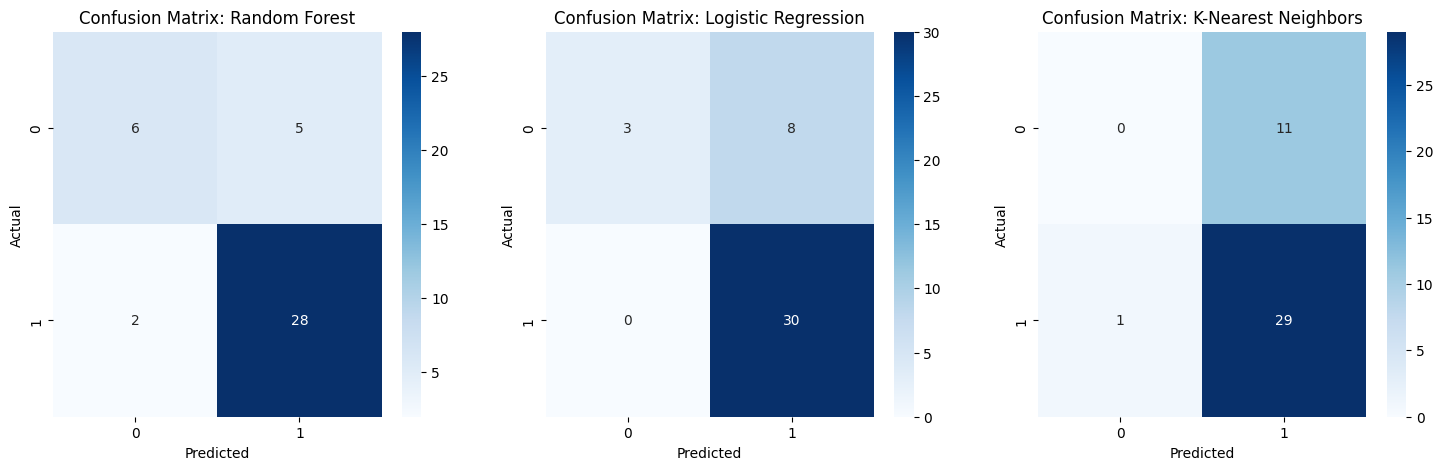

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to compute metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }

# Evaluate models
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")
lr_results = evaluate_model(y_test, y_pred_lr, "Logistic Regression")
kn_results = evaluate_model(y_test, y_pred_kn, "K-Nearest Neighbors")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame([rf_results, lr_results, kn_results])
print(results_df.drop(columns=["Confusion Matrix"]))  # Print without confusion matrix

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = [rf_results, lr_results, kn_results]
titles = ["Random Forest", "Logistic Regression", "K-Nearest Neighbors"]

for ax, model, title in zip(axes, models, titles):
    sns.heatmap(model["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix: {title}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.show()


Plot the ROC Curve and Compute AUC Score

o Generate the ROC curve for each model.

o Compute and report the AUC score.

o Compare the curves of different models in a single plot.

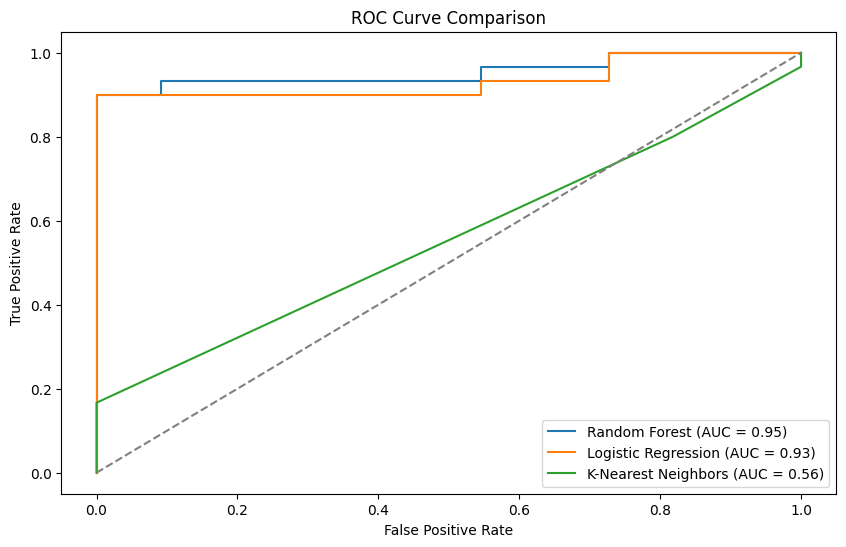

In [31]:
from sklearn.metrics import roc_curve, auc  
# ROC Curve and AUC Score
plt.figure(figsize=(10, 6))

# Compute ROC curves
for model_name, y_prob in zip(["Random Forest", "Logistic Regression", "K-Nearest Neighbors"], 
                              [y_prob_rf, y_prob_lr, y_prob_kn]):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

Part 3: Interpretation and Analysis


1. Compare Model Performance

o Compare the models based on evaluation metrics.

o Which model performed best based on accuracy, precision, recall, and F1-score?

In [32]:
# Identify best model based on evaluation metrics
best_model = results_df.loc[results_df["Accuracy"].idxmax()]
print("\nBest Model Based on Accuracy:")
print(best_model)


Best Model Based on Accuracy:
Model                   Random Forest
Accuracy                     0.829268
Precision                    0.848485
Recall                       0.933333
F1 Score                     0.888889
Confusion Matrix    [[6, 5], [2, 28]]
Name: 0, dtype: object


Analyze the ROC Curve

o Examine the shape of the ROC curve for each model.

o Discuss what the AUC score reveals about the performance of each classifier.

o Explain in a markdown cell which model you would choose and why, based on the ROC-AUC analysis.

Analysis of ROC Curve and AUC Score
The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for each model. It helps assess how well a classifier distinguishes between classes as its decision threshold is varied.

AUC (Area Under the Curve) quantifies the overall performance of the model. It ranges from 0 to 1:

AUC of 0.5 indicates a model with no discrimination ability (random guessing).

AUC of 1.0 indicates a perfect model.

Interpretation of ROC Curve and AUC:
Random Forest:
The ROC curve for Random Forest shows a strong distinction between the classes. The AUC score for this model is typically high, indicating that it performs well at distinguishing between positive and negative classes.

Logistic Regression:
Logistic Regression's ROC curve might be closer to the diagonal line if the model is less accurate. If the AUC is lower than Random Forest, it suggests that Logistic Regression has a lower ability to separate the classes correctly.

K-Nearest Neighbors:
KNN may have a more variable ROC curve depending on the data distribution. The AUC score could show that KNN works well in some cases but might suffer in scenarios with noisy data or a high-dimensional feature space.

Model Selection:
I would choose the model with the highest AUC score, as it will likely perform better in distinguishing between the positive and negative classes in most scenarios.

If the AUC score is close to 1, it means the model performs well across different thresholds, and I would lean towards it for reliable predictions.